In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import sklearn
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.tree import plot_tree

RANDOM_SEED = 1

# Step 1: Load the dataset and explore it

https://www.kaggle.com/datasets/uciml/autompg-dataset

In [153]:
from google.colab import drive
drive.mount('/content/drive')
project_dir = 'drive/MyDrive/UW.8740/Week 05 - Trees/'
file_name = 'auto-mpg.csv'
data = pd.read_csv(project_dir + file_name)
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


- Notice horsepower is of type object; let's investigate this further

In [155]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [156]:
data.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [157]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [158]:
# The reason horsepower is loaded as type object is that we have non numeric values in the column
data['horsepower'].str.count('\?').sum()

6

In [159]:
data[data['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [160]:
# Replace '?' with NaN in the entire DataFrame
data.replace('?', np.nan, inplace=True)

In [161]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [162]:
# too many car names, almost the same number of rows in a dataset,
# drop the column as it is unlikely to have any predictive value
del data['car name']

data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [163]:
# check for duplicate rows
data.duplicated().sum()

0

In [164]:
data.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392,398.000000,398.000000,398.000000,398.000000
unique,NaN,NaN,NaN,93,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000


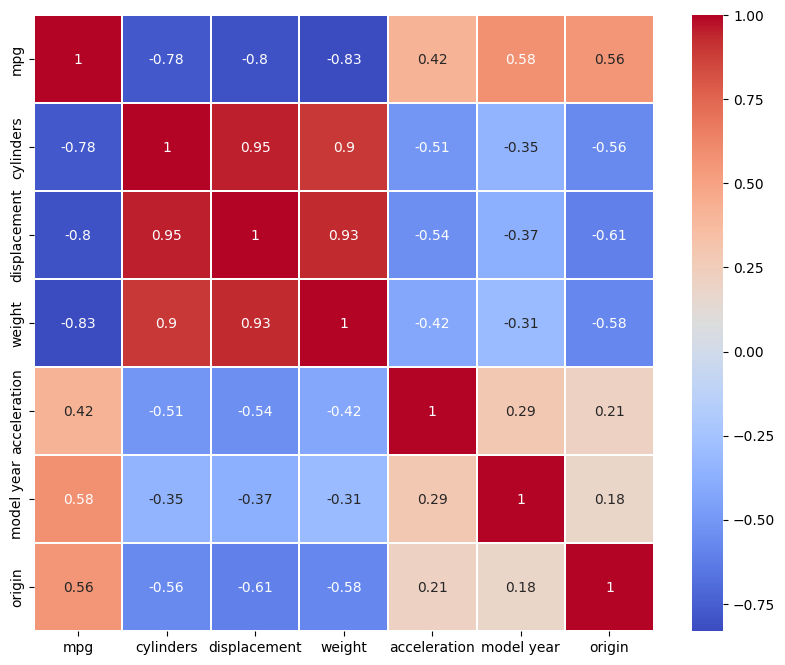

In [165]:
# visualize correlation with a heatmap

fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.004)
plt.show()

We can see there is a correlation.  But we don't know if the correlation is linear

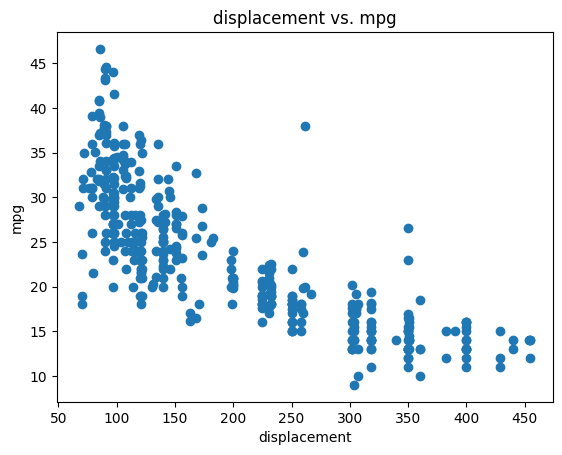

In [166]:
# displacement vs. mpg visualization

# Create scatter plot
plt.scatter(data['displacement'], data['mpg'])

# Set labels and title
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.title('displacement vs. mpg')

# Display the plot
plt.show()

Notice the non-linear relationship between the feature and the target.  Some models may not be able to capture non-linear relationships

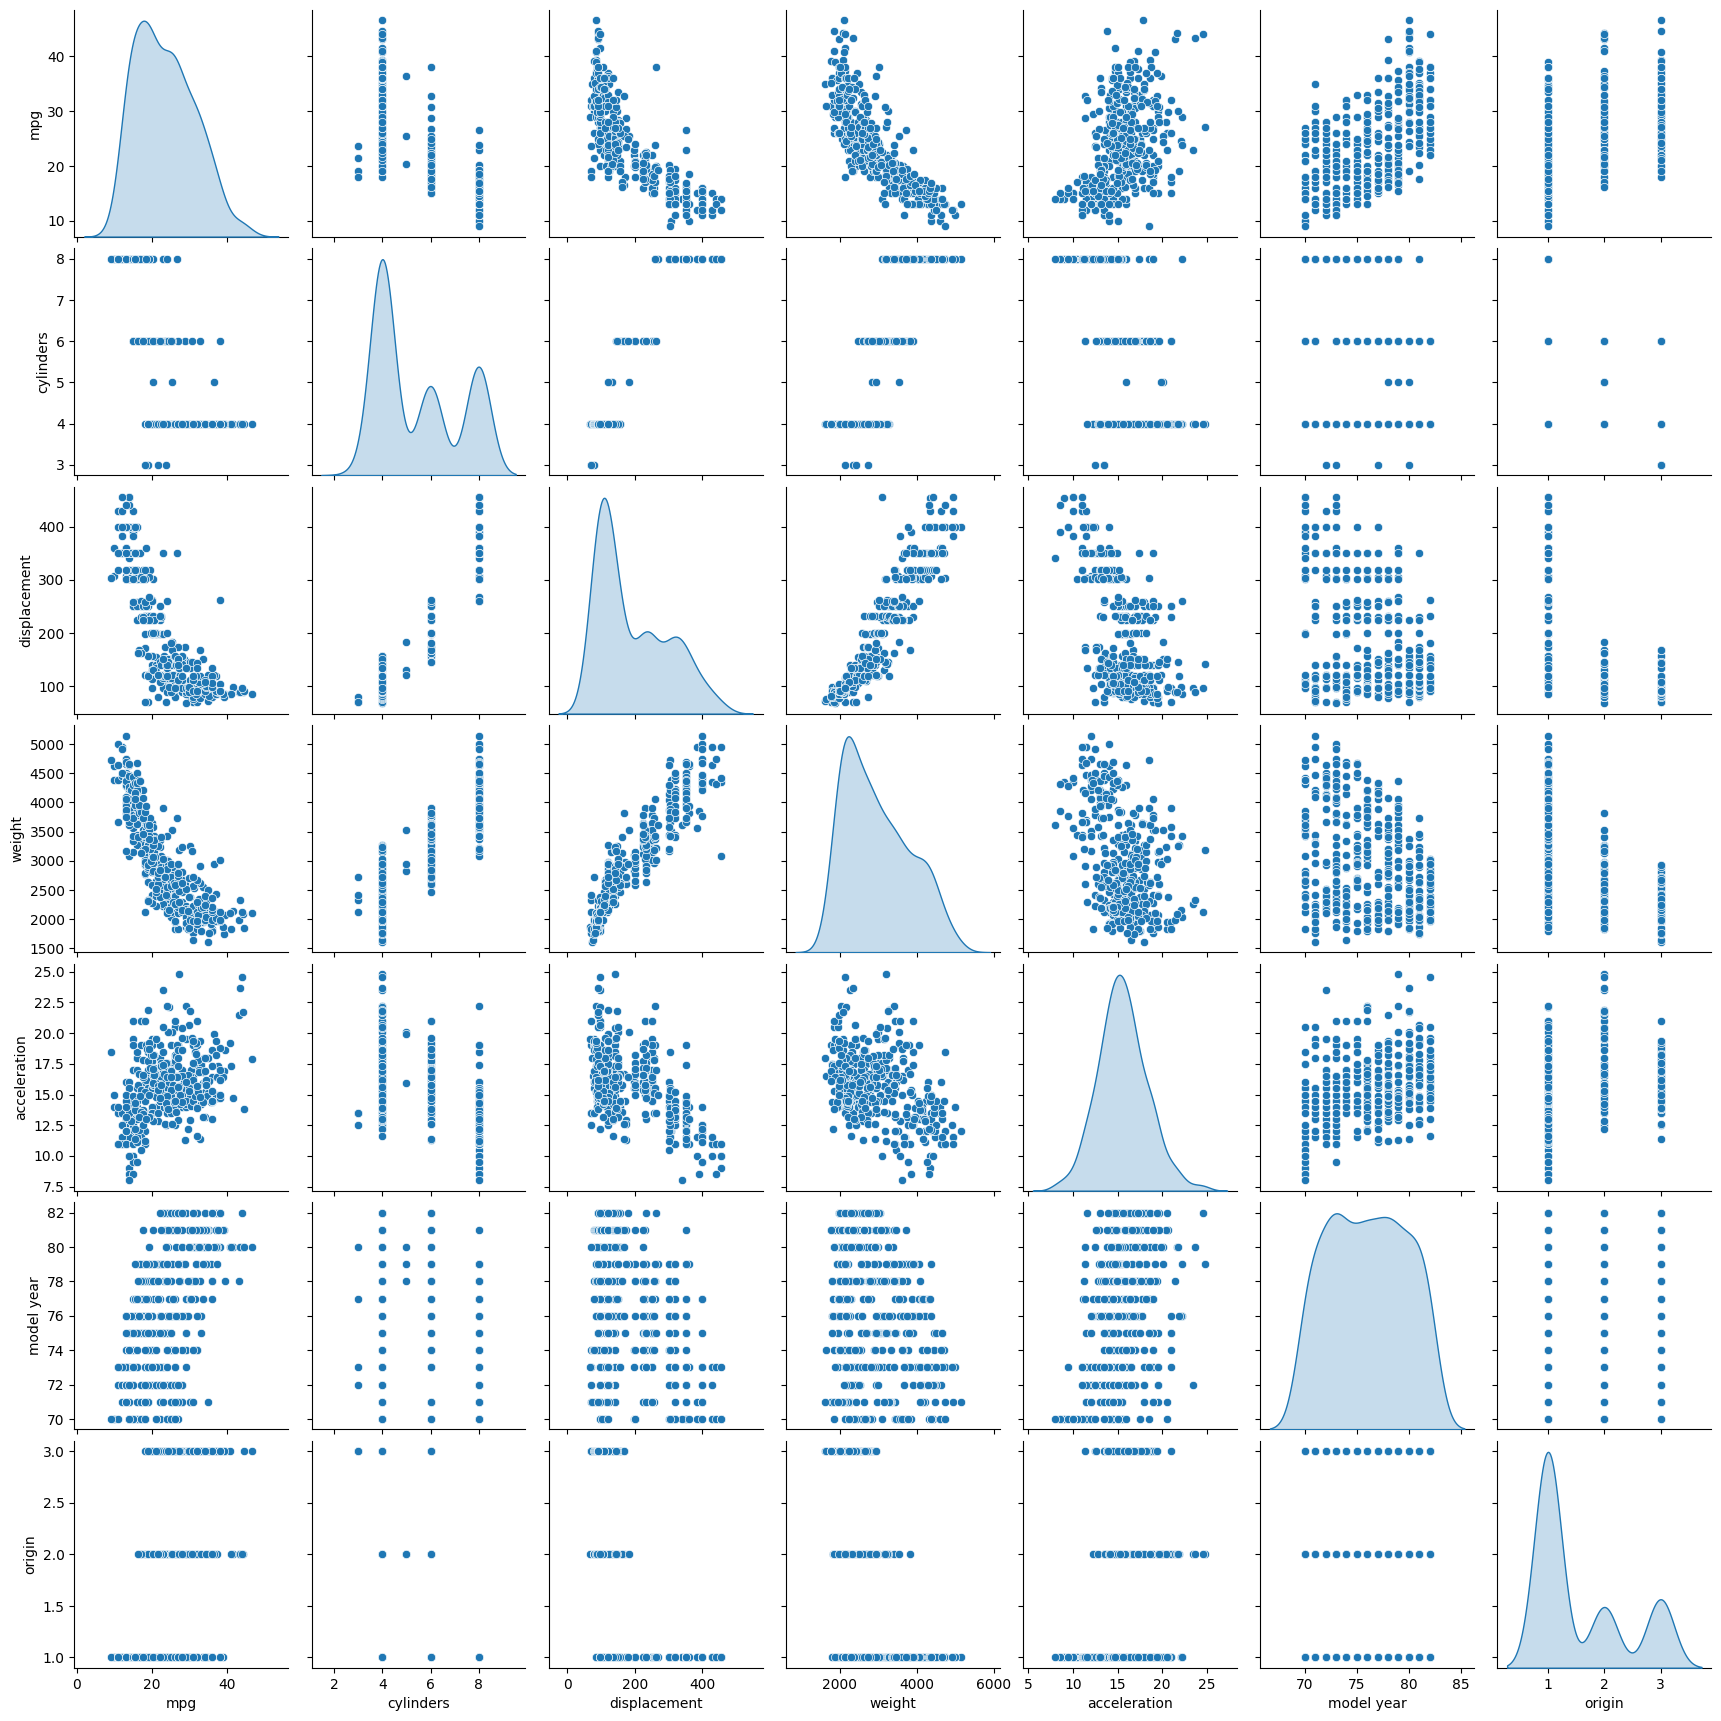

In [167]:
sns.pairplot(data,diag_kind = 'kde')

# Step 3: Split the dataset into training and test sets

In [168]:
X = data.drop('mpg', axis=1)  # Features
y = data['mpg']  # Target variable

In [169]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1
394,4,97.0,52,2130,24.6,82,2
395,4,135.0,84,2295,11.6,82,1
396,4,120.0,79,2625,18.6,82,1


In [170]:
X[0:5]

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


In [171]:
X[393:397]

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
393,4,140.0,86,2790,15.6,82,1
394,4,97.0,52,2130,24.6,82,2
395,4,135.0,84,2295,11.6,82,1
396,4,120.0,79,2625,18.6,82,1


In [172]:
X.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [174]:
X.shape

(398, 7)

Compare the median value for train, test and the entire dataset

In [175]:
X_train['horsepower'].median()

92.0

In [176]:
X_test['horsepower'].median()

95.0

In [177]:
X['horsepower'].median()

93.5

## Feature Imputation

In [178]:
X_train.head(1)

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
157,8,350.0,145,4440,14.0,75,1


In [179]:
X_test.head(1)

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
198,4,91.0,53,1795,17.4,76,3


In [180]:
imputer = SimpleImputer(strategy="median")
imputer.fit(X_train)
X_train = imputer.transform(X_train)


imputer.fit(X_test)
X_test = imputer.transform(X_test)

In [181]:
# the data is returned as a numpy array!
print (type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [182]:
X.shape

(398, 7)

In [183]:
# Step 4: Build the regression tree model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [184]:
# Step 5: Evaluate the model

y_pred = dt.predict(X_train)

mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = mean_squared_error(y_train, y_pred, squared = False)

print('Train Mean Absolute Error:', mae)
print('Train Mean Squared Error:', mse)
print('Train Root Mean Squared Error:', rmse)

print('*******')
print('*******')

y_pred = dt.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)

print('Train Mean Absolute Error:', mae)
print('Test Mean Squared Error:', mse)
print('Test Root Mean Squared Error:', rmse)


Train Mean Absolute Error: 0.0
Train Mean Squared Error: 0.0
Train Root Mean Squared Error: 0.0
*******
*******
Train Mean Absolute Error: 2.3625
Test Mean Squared Error: 12.669416666666669
Test Root Mean Squared Error: 3.5594124046907893


Test error is greater than training error, this model is overfitting to training

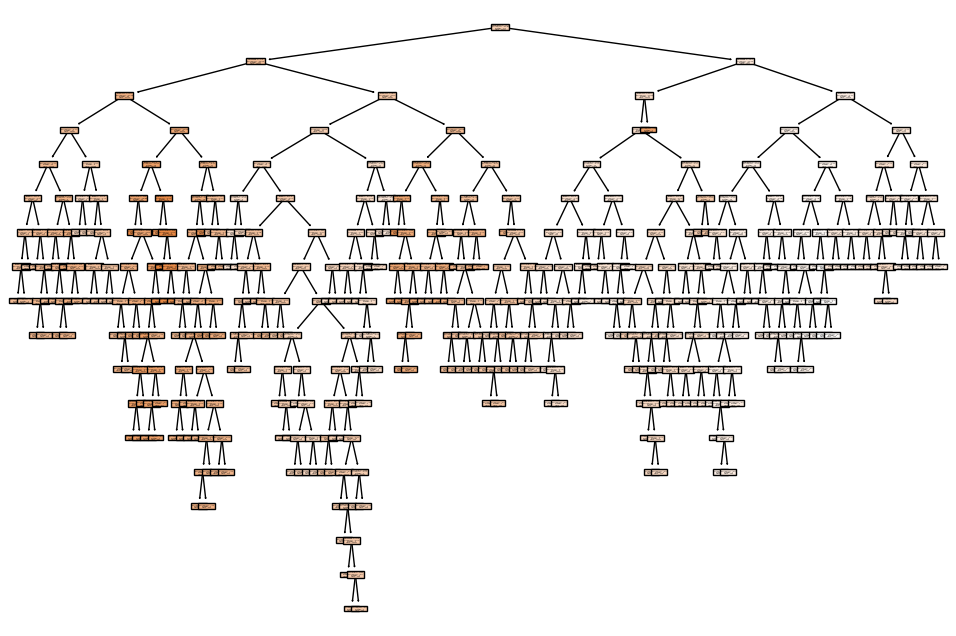

In [185]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X.columns, filled=True)
plt.show()

In [186]:
print(dt.tree_.max_depth)

17


- We may have a case of overfitting due to the depth of the tree

In [187]:
# Step 4: Build the regression tree model
dt2 = DecisionTreeRegressor(max_depth=4,
                           #each leaf must contain at least 10% of the training data
                           min_samples_leaf= 0.1,
                           random_state=3)
dt2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)

In [188]:
# Step 5: Evaluate the model
y_pred = dt2.predict(X_train)

mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = mean_squared_error(y_train, y_pred, squared = False)

print('Train Mean Absolute Error:', mae)
print('Train Mean Squared Error:', mse)
print('Train Root Mean Squared Error:', rmse)

print('*******')
print('*******')

y_pred = dt2.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)

print('Train Mean Absolute Error:', mae)
print('Test Mean Squared Error:', mse)
print('Test Root Mean Squared Error:', rmse)

Train Mean Absolute Error: 2.5033451703845837
Train Mean Squared Error: 11.55958777862807
Train Root Mean Squared Error: 3.399939378669577
*******
*******
Train Mean Absolute Error: 2.890052336020758
Test Mean Squared Error: 13.203811862700825
Test Root Mean Squared Error: 3.633704977388894


In [189]:
dt2.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 0.1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 3,
 'splitter': 'best'}

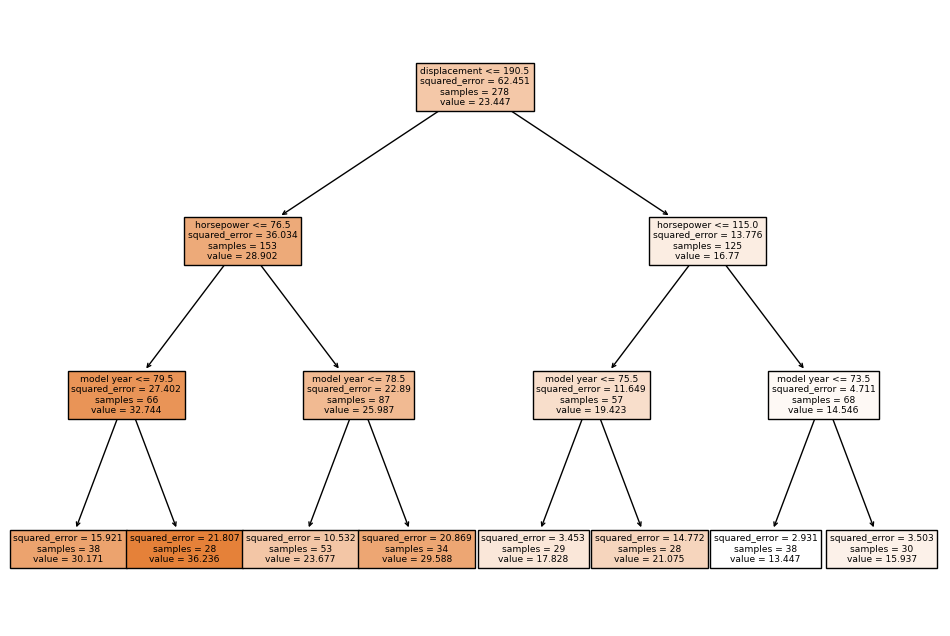

In [190]:
plt.figure(figsize=(12, 8))
plot_tree(dt2, feature_names=X.columns, filled=True)
plt.show()

In [191]:
print(dt2.tree_.max_depth)

3


In [192]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [193]:
dt3 = DecisionTreeRegressor(max_depth=4,
                           #each leaf must contain at least 10% of the training data
                           min_samples_leaf= 0.14,
                           random_state=3)

MSE_CV = cross_val_score(dt3, X_train, y_train, cv=10,
                         scoring = 'neg_mean_squared_error',
                         n_jobs =-1)
# https://scikit-learn.org/stable/modules/model_evaluation.html

dt3.fit(X_train,y_train)
y_pred_train = dt3.predict(X_train)
y_pred_test = dt3.predict(X_test)

y_pred = dt3.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)

print('Test Mean Absolute Error:', mae)
print('Test Mean Squared Error:', mse)
print('Test Root Mean Squared Error:', rmse)


Test Mean Absolute Error: 3.1298917748917745
Test Mean Squared Error: 17.440929476170208
Test Root Mean Squared Error: 4.176233886669928


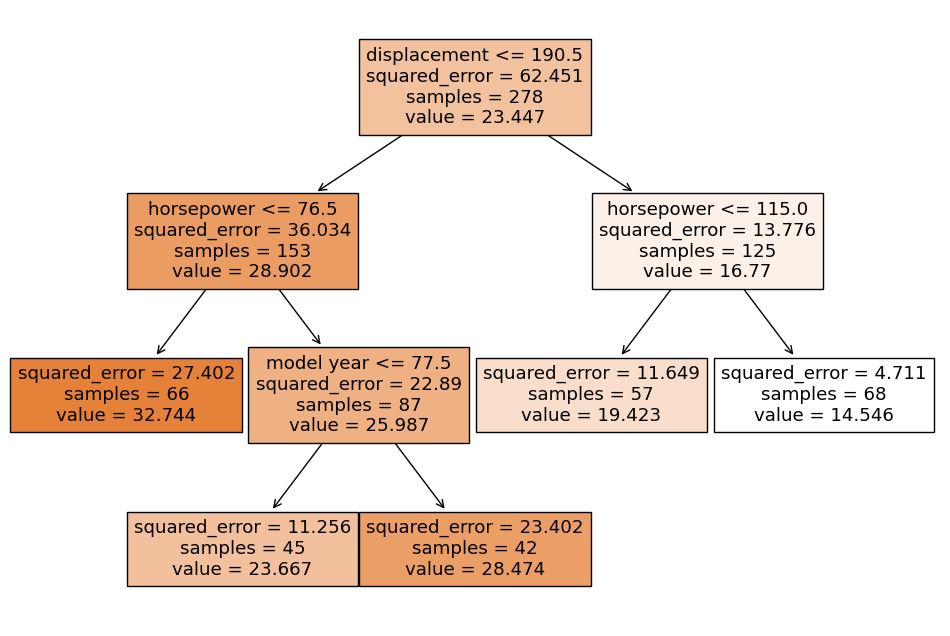

In [194]:
plt.figure(figsize=(12, 8))
plot_tree(dt3, feature_names=X.columns, filled=True)
plt.show()

In [195]:
print(dt3.tree_.max_depth)

3


In [196]:
data.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
